# Homework exercise 2
## Deadline: upload to Moodle by 3 December 18:00 h

__Suggestion: take this notebook and simply add your code and explanations. Your submission needs to include your code's output (even if the code throws an error).__

If you prefer to use .py files, you are expected to also include a PDF containing the output of your code and your explanations. Still, the code needs to be in a form that can be easily run on another computer.

If you use any file paths, assign paths to variables at the beginning of your code and use those variables when later referring to the paths.

__Name:__ Moritz-Jakob Leithner

The name of the file that you upload should be named *Homework1_YourLastName_YourStudentID*.

Reminder: you are required to attend class on 4 December to earn points for this homework exercise unless you have a valid reason for your absence.

You are encouraged to work on this exercise in teams of up to three students. If any part of the questions is unclear, please ask on the Moodle forum.

#### Options Pricing via Monte Carlo Simulations and Analytical Methods

In this problem set, you will be asked to implement analytical as well as simulation-based methods for plain vanilla options —standardized contracts with no additional features—, as well as simulation-based methods for some more complex exotic options.

You may skip the next section if you are already familiar with the topic.

#### Introduction to pricing plain vanilla options

Among the various types of options, plain vanilla European options are the most fundamental. A European option is characterized by the right, but not the obligation, to buy (in the case of a call option) or sell (in the case of a put option) an underlying asset at a predetermined strike price on a specific expiration date.

##### Payoff Functions

The payoff function for a European call option is defined as:

$\text{Payoff}_{\text{call}} = \max(S_T - K, 0)$
    
where $S_T$ is the price of the underlying asset at maturity, and $K$ is the strike price. This means that if the asset price at maturity is above the strike price, the holder can purchase the asset at the strike price and realize a gain equal to the difference. If the asset price is below the strike price, the option expires worthless, and the loss is limited to the premium paid for the option.

Conversely, the payoff function for a European put option is: 

$\text{Payoff}_{\text{put}} = \max(K - S_T, 0)$

This reflects the holder's right to sell the asset at the strike price. The put option is valuable if the asset price falls below the strike price, allowing the holder to sell the asset at a higher price than the market offers.

##### The Black-Scholes Formula

For a non-dividend-paying asset, the Black-Scholes price of a European call option is given by:

$C(S, t) = S N(d_1) - Ke^{-rt} N(d_2)$

and the price of a European put option is given by:

$P(S, t) = Ke^{-rt} N(-d_2) - S N(-d_1)$

where:

* $C(S,t)$ and $P(S,t)$ are the call and put option prices, respectively.
* $S$ is the current price of the underlying asset.
* $K$ is the strike price.
* $r$ is the risk-free interest rate.
* $t$ is the time to expiration.
* $N(⋅)$ is the cumulative distribution function of the standard normal distribution.
* $d_1=\frac{ln(S/K)+(r+\sigma^2/2)t}{\sigma\sqrt{t}}$ and $d_2=d_1-\sigma\sqrt{t}$, where $\sigma$ is the volatility of the asset's returns.


#### Options pricing via simulations

Pricing options via Monte Carlo simulations consists of

* randomly drawing stock price paths based on an assumed distribution
* computing the option payoff for each path and discounting the payoff to the present
* averaging those discounted values

It is assumed that the stock price follows a log-normal distribution, i.e., logarithmic returns follow a normal distribution. The mean return used in the simulations is the risk-free rate, the standard deviation is the assumed volatility (called "implied volatility", as this volatility is implied by the option price).

1. Implement the Black-Scholes formula for both calls and puts. Plot prices for varying strike prices, volatility, and time to maturity in three-dimensional graphs (each time holding one of these dimensions and the stock price fixed). 

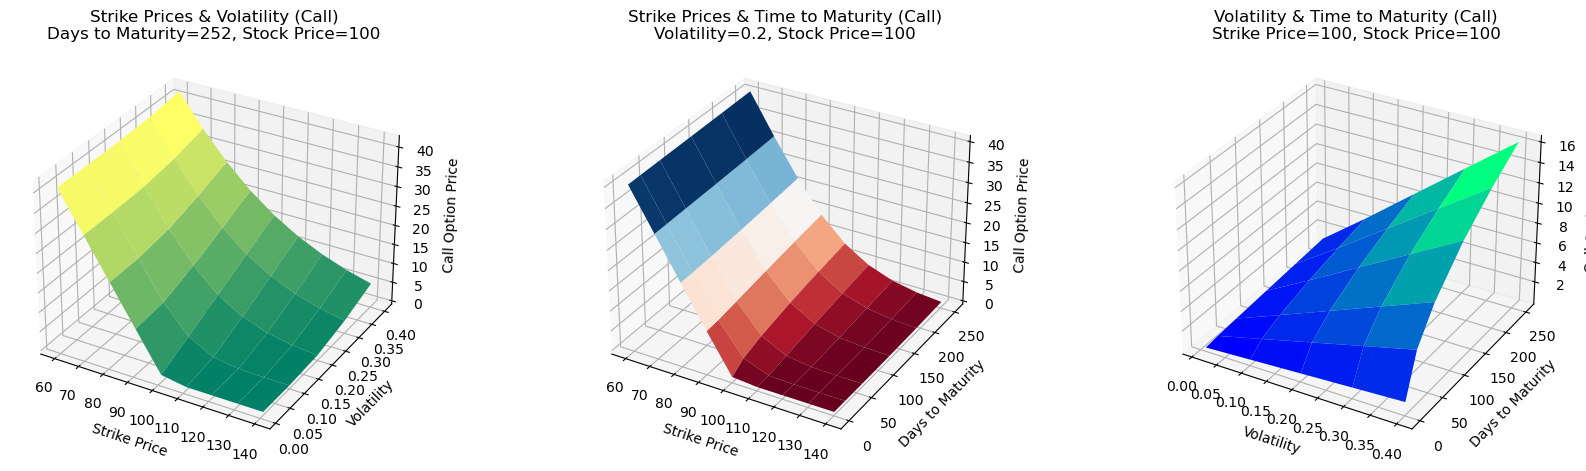

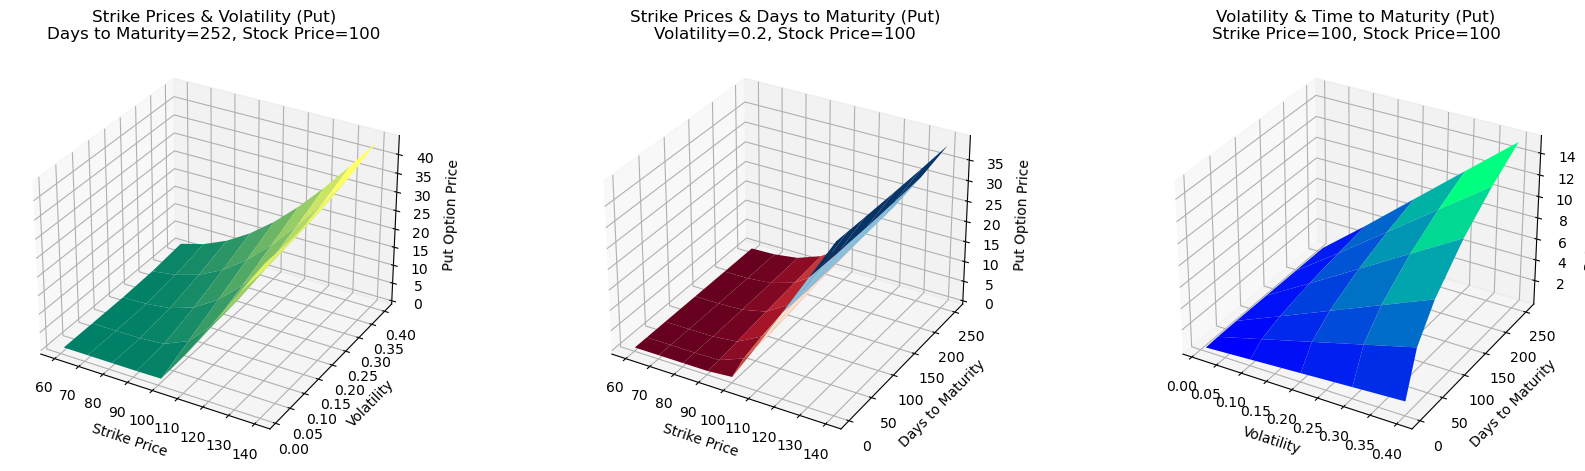

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Black-Scholes for call and put options
def black_scholes_closed_form(S0, K, T, r, v):
    T_y  = T / 252
    d1 = (np.log(S0 / K) + (r + v**2 / 2) * T_y) / (v * np.sqrt(T_y))
    d2 = d1 - v * np.sqrt(T_y)
    call_price = S0 * stats.norm.cdf(d1) - K * np.exp(-r * T_y) * stats.norm.cdf(d2)
    put_price = K * np.exp(-r * T_y) * stats.norm.cdf(-d2) - S0 * stats.norm.cdf(-d1)
    return call_price, put_price

# Parameters for plotting
r = 0.01  # risk-free interest rate
S0 = 100 # stock price
sigma_values = [0.01, 0.1, 0.2, 0.3, 0.4]  # volatilities
K_values = [60, 70, 80, 90, 100, 110, 120, 130, 140]  # strike prices
t_values = [1, 25, 63, 126, 190, 252]  # times to maturity  (in days)

# Fixed parameters for individual plots

fixed_time_to_maturity = t_values[-1]
fixed_volatility = sigma_values[2]
fixed_strike_price = K_values[4]
fixed_stock_price = S0

# Mesh grids for plotting
X1, Y1 = np.meshgrid(K_values, sigma_values)  # Strike prices & volatility
X2, Y2 = np.meshgrid(K_values, t_values)      # Strike prices & time to maturity
X3, Y3 = np.meshgrid(sigma_values, t_values)  # Volatility & time to maturity

# Calculating option prices for plotting
Z1_call = np.array([[black_scholes_closed_form(S0, K, fixed_time_to_maturity, r, sigma)[0]
                     for K in K_values] for sigma in sigma_values])
Z1_put = np.array([[black_scholes_closed_form(S0, K, fixed_time_to_maturity, r, sigma)[1]
                    for K in K_values] for sigma in sigma_values])

Z2_call = np.array([[black_scholes_closed_form(S0, K, t, r, fixed_volatility)[0]
                     for K in K_values] for t in t_values])
Z2_put = np.array([[black_scholes_closed_form(S0, K, t, r, fixed_volatility)[1]
                    for K in K_values] for t in t_values])

Z3_call = np.array([[black_scholes_closed_form(S0, fixed_strike_price, t, r, sigma)[0]
                     for sigma in sigma_values] for t in t_values])
Z3_put = np.array([[black_scholes_closed_form(S0, fixed_strike_price, t, r, sigma)[1]
                    for sigma in sigma_values] for t in t_values])



#plots for Call options
fig = plt.figure(figsize=(20, 6)) 


ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X1, Y1, Z1_call, cmap='summer')
ax1.set_title(f'Strike Prices & Volatility (Call)\nDays to Maturity={fixed_time_to_maturity}, Stock Price={fixed_stock_price}')
ax1.set_xlabel('Strike Price')
ax1.set_ylabel('Volatility')
ax1.set_zlabel('Call Option Price')

ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X2, Y2, Z2_call, cmap='RdBu')
ax2.set_title(f'Strike Prices & Time to Maturity (Call)\nVolatility={fixed_volatility}, Stock Price={fixed_stock_price}')
ax2.set_xlabel('Strike Price')
ax2.set_ylabel('Days to Maturity')
ax2.set_zlabel('Call Option Price')

ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(X3, Y3, Z3_call, cmap='winter')
ax3.set_title(f'Volatility & Time to Maturity (Call)\nStrike Price={fixed_strike_price}, Stock Price={fixed_stock_price}')
ax3.set_xlabel('Volatility')
ax3.set_ylabel('Days to Maturity')
ax3.set_zlabel('Call Option Price')

plt.subplots_adjust(wspace=0.4)  
plt.show()

#plots for Put options
fig = plt.figure(figsize=(20, 6)) 

ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X1, Y1, Z1_put, cmap='summer')
ax1.set_title(f'Strike Prices & Volatility (Put)\nDays to Maturity={fixed_time_to_maturity}, Stock Price={fixed_stock_price}')
ax1.set_xlabel('Strike Price')
ax1.set_ylabel('Volatility')
ax1.set_zlabel('Put Option Price')

ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X2, Y2, Z2_put, cmap='RdBu')
ax2.set_title(f'Strike Prices & Days to Maturity (Put)\nVolatility={fixed_volatility}, Stock Price={fixed_stock_price}')
ax2.set_xlabel('Strike Price')
ax2.set_ylabel('Days to Maturity')
ax2.set_zlabel('Put Option Price')

ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(X3, Y3, Z3_put, cmap='winter')
ax3.set_title(f'Volatility & Time to Maturity (Put)\nStrike Price={fixed_strike_price}, Stock Price={fixed_stock_price}')
ax3.set_xlabel('Volatility')
ax3.set_ylabel('Days to Maturity')
ax3.set_zlabel('Put Option Price')

plt.subplots_adjust(wspace=0.4)  
plt.show()



2. Implement a simulator of stock prices. It needs to accept at least the following inputs:

* risk-free rate
* volatility
* current price
* unit of time for simulation (minutes, hours, days)
* time to maturity (measured in days)
* number of price paths to simulate

Use the simulator to price plain vanilla options. For parameter values of your choice, make a plot showing how the difference between prices obtained from the simulation and from the analytical formula changes with the number of simulated paths.

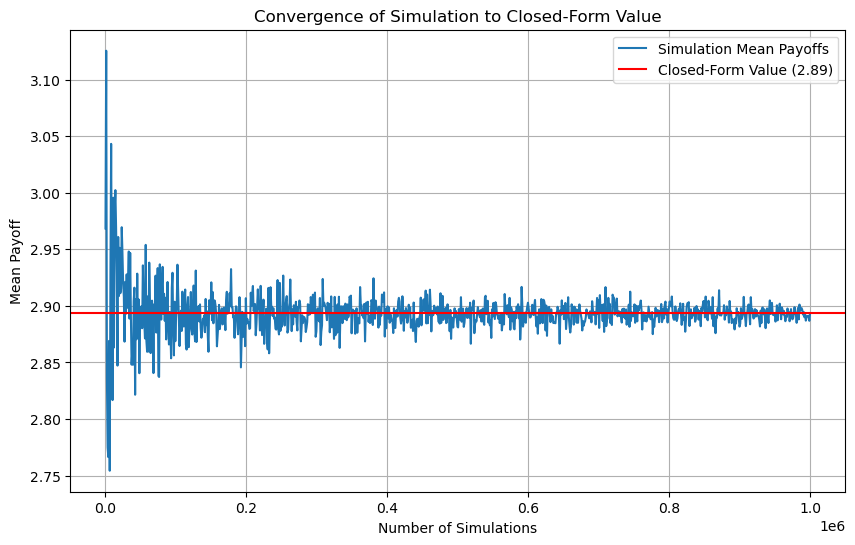

In [2]:
import random
random.seed(12345)


def euro_Csim(S0, K, T, r, v, NSim):
    '''
    S0: initial price
    K: strike price
    T: time to maturity (in days)
    r: risk-free rate
    v: volatility
    NSim: number of simulations
    '''

    # Convert T to years -> 252 trading days per year
    T_y = T / 252

    S = []
    W = np.random.standard_normal(NSim)
    S = S0 * np.exp((r - 0.5 * v**2) * T_y + v * np.sqrt(T_y) * W)

    disc_Pay_Call = np.exp(-r * T_y) * np.maximum(S - K, 0)
    mPay_Call = np.mean(disc_Pay_Call)

    return mPay_Call,S



Sims1 = [euro_Csim(90, 100, 150, 0.05, 0.2, NSim) for NSim in range(1000,1000001, 1000)]
C = black_scholes_closed_form(90, 100, 150, 0.05, 0.2)[0]

# Extracting the mean payoffs from the simulation results in 'Sims1'
mean_payoffs = [result[0] for result in Sims1]
sim_counts = range(1000, 1000001, 1000)

# Plotting the mean payoffs against the number of simulations, and marking the closed-form result 'C'
plt.figure(figsize=(10, 6))
plt.plot(sim_counts, mean_payoffs, label='Simulation Mean Payoffs')
plt.axhline(y=C, color='r', linestyle='-', label=f'Closed-Form Value ({C:.2f})')    # {C:.2f} :show C w/ 2 decimal places
plt.xlabel('Number of Simulations')
plt.ylabel('Mean Payoff')
plt.title('Convergence of Simulation to Closed-Form Value')
plt.legend()
plt.grid(True)
plt.show()

3. You will now turn to pricing options that cannot be priced analytically. In this task, you are asked to price Asian options. The payoff of Asian options depends on the average price of the underlying asset over a certain period.
The payoff of an Asian Call Option is

$C_{\text{Asian}}(T) = \max\left(\bar{S}(T) - K, 0\right)$

and that of an Asian Put Option

$P_{\text{Asian}}(T) = \max\left(K - \bar{S}(T), 0\right)$

where $\bar{S}(T)$ represents the average price of the underlying asset over a set of days. For simplicity, we will focus on the type of Asian option that considers the average over the last $D$ days until maturity (so-called Asian-Out options). While both arithmetic and geometric averages can be used in Asian options, we will consider only the arithmetic average here.

Determine the prices of Asian options using Monte Carlo simulations. Your implementation should allow for variation in the number of days $D$ used for the computation of $\bar{S}(T)$, which is then defined as the average over days $T-D-1$ to $T$. Make plots comparing the prices of plain vanilla and Asian options with otherwise identical parameter values.

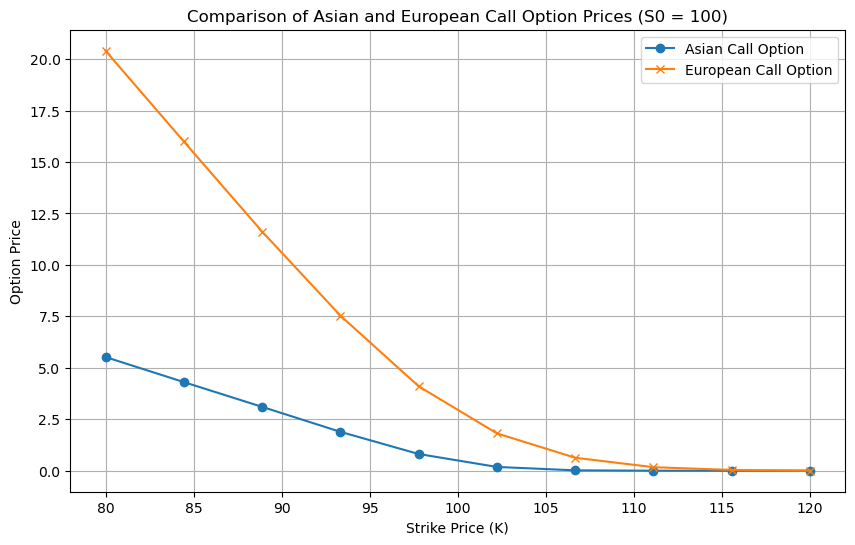

In [3]:
def asia_Csim(S0, K, D, dt, r, v, NSim):
    '''
    S0: initial stock price
    K: strike price
    D: Days to maturity (in years)
    dt: time step
    r: risk free rate
    v: volatility
    NSim: number of simulations
    '''
    nsteps = int((D/ 252)/ dt)    #daily steps
    S_euler = np.zeros((NSim, nsteps)) 
    dW = np.zeros((NSim, nsteps))
    disc_payoff = np.zeros(NSim)

    for j in range(NSim):
        dW[j] = np.sqrt(dt) * np.random.standard_normal(nsteps)
        S_euler[j][0] = S0

        for i in range(1, nsteps):
            S_euler[j][i] = S_euler[j][i - 1] + r * S_euler[j][i - 1] * dt + v * S_euler[j][i - 1] * dW[j][i - 1]
        disc_payoff[j] = np.exp(-r * D) * np.max((np.mean(S_euler[j]) - K, 0))
    
    SimPay = np.mean(disc_payoff)

    return SimPay


# Parameters
S0 = 100  # Initial stock price
K_values = np.linspace(80, 120, 10)  # Strike prices
D = 26  # days
dt = 1/252  # Daily steps
r = 0.05  # Risk-free rate
v = 0.2  # Volatility
NSim = 100000  # Number of simulations

asia_prices = []
euro_prices = []

for K in K_values:
    asia_price = asia_Csim(S0, K, D, dt, r, v, NSim)
    euro_price = euro_Csim(S0, K, D, r, v, NSim)
    asia_prices.append(asia_price)
    euro_prices.append(euro_price[0])

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(K_values, asia_prices, label='Asian Call Option', marker='o')
plt.plot(K_values, euro_prices, label='European Call Option', marker='x')
plt.xlabel('Strike Price (K)')
plt.ylabel('Option Price')
plt.title('Comparison of Asian and European Call Option Prices (S0 = 100)')
plt.legend()
plt.grid(True)
plt.show()



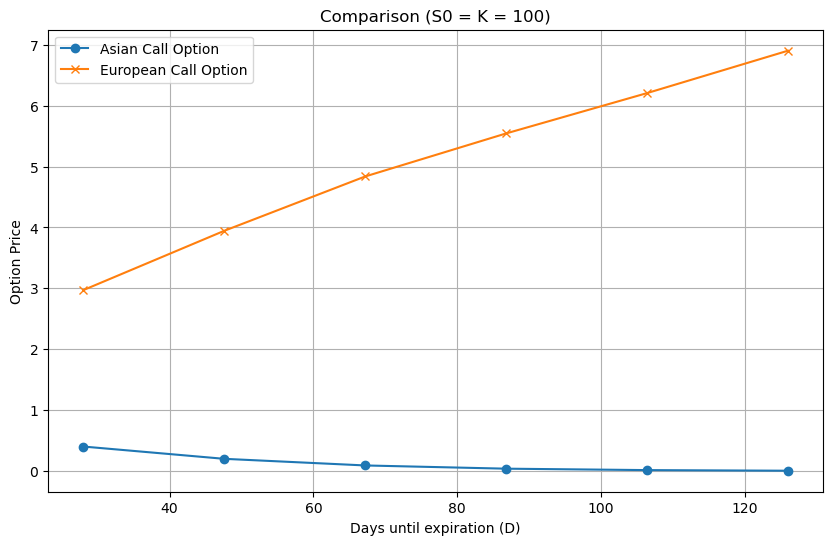

In [4]:
# Parameters
S0 = 100 # Initial stock price
K = 100  # Strike prices
D_values = np.linspace(28, 252/2, 6)  # days
dt = 1/252  # Daily steps
r = 0.05  # Risk-free rate
v = 0.2 # Volatility
NSim = 100000  # Number of simulations

asia_prices = []
euro_prices = []

for D in D_values:
    asia_price = asia_Csim(S0, K, D, dt, r, v, NSim)
    euro_price = euro_Csim(S0, K, D, r, v, NSim)
    asia_prices.append(asia_price)
    euro_prices.append(euro_price[0])

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(D_values, asia_prices, label='Asian Call Option', marker='o')
plt.plot(D_values, euro_prices, label='European Call Option', marker='x')
plt.xlabel('Days until expiration (D)')
plt.ylabel('Option Price')
plt.title('Comparison (S0 = K = 100)')
plt.legend()
plt.grid(True)
plt.show()

4. We will finally consider Barrier options. Barrier options are a type of exotic option where the payoff depends on whether the underlying asset's price reaches a certain level, known as the barrier, during the option's life.

There are two main types of barrier options: knock-in and knock-out. A knock-in option becomes active only if the price of the underlying asset crosses a certain level. By contrast, a knock-out option expires worthless if the price of the underlying asset ever crosses a certain level. The options can further be distinguished by whether the price threshold is crossed from below (Up-and-out, Up-and-in) or above (Down-and-out, Down-and-in). Each of these four types of options exist for both calls and puts, thus yielding eight different payoff functions. At maturity the payoff of a barrier option, if it is active, is identical to that of an otherwise similar plain vanilla call or put option.

Determine the prices of barrier options using Monte Carlo simulations. Make plots comparing the prices of plain vanilla and Barrier options with otherwise identical parameter values, and show how the difference in prices depends on the distance of the present stock price from the barrier.

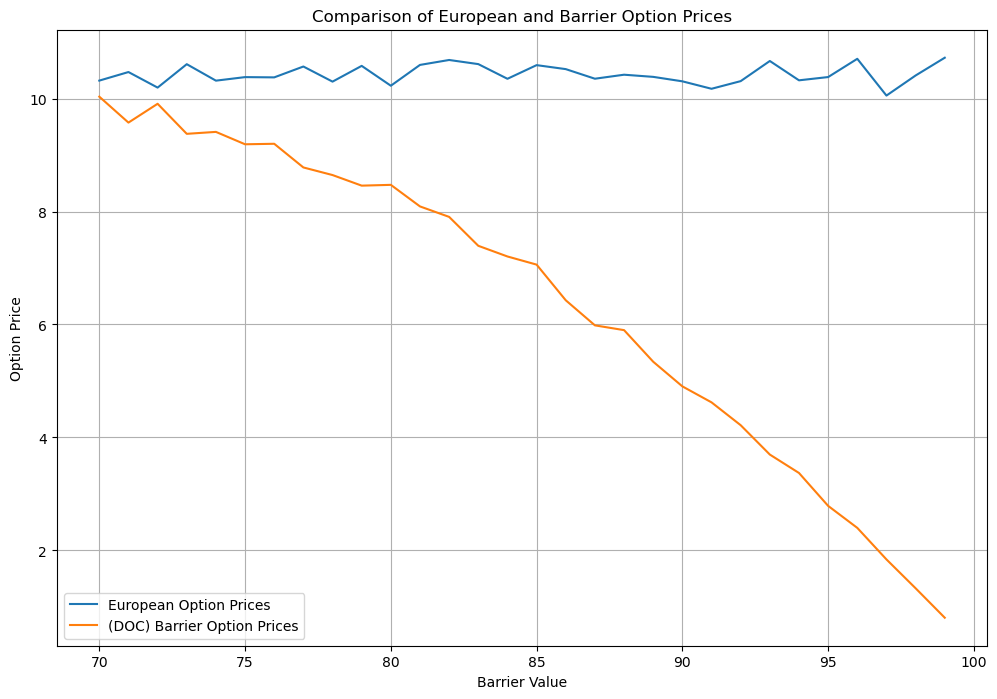

In [5]:
def barrier_Csim(S0, K, T, r, v, B, NSim):
    '''
    S0: initial price
    K: strike price
    T: time to maturity (in days)
    r: risk-free rate
    v: volatility
    B: barrier price
    NSim: number of simulations
    '''
    T_y = T / 252

    W = np.random.standard_normal(NSim)
    S = S0 * np.exp((r - 0.5 * v**2) * T_y + v * np.sqrt(T_y) * W)

    # Down-and-Out option

    for i in range(NSim):
        path = S0 * np.exp((r - 0.5 * v**2) * np.linspace(0, T_y, T) + v * np.sqrt(T_y/T) * np.cumsum(np.random.standard_normal(T)))
        if np.min(path) <= B:    # The option becomes worthless if the stock price hits or falls below the barrier at any point
            S[i] = 0

    disc_Pay_Call = np.exp(-r * T_y) * np.maximum(S - K, 0)
    mPay_Call = np.mean(disc_Pay_Call)

    return mPay_Call

# Parameters
S0 = 100  # Initial stock price
K = 100  # Strike price
T = 252  # Time to maturity (in days)
r = 0.05  # Risk-free rate
v = 0.2  # Volatility
NSim = 10000  # Number of simulations
B_values = np.linspace(70, 99, 30)  # Barrier values

# Calculating option prices
euro_prices = [euro_Csim(S0, K, T, r, v, NSim)[0] for _ in B_values]
barrier_prices = [barrier_Csim(S0, K, T, r, v, B, NSim) for B in B_values]
#price_differences = np.array(euro_prices) - np.array(barrier_prices)

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(B_values, euro_prices, label='European Option Prices')
plt.plot(B_values, barrier_prices, label='(DOC) Barrier Option Prices')
#plt.plot(B_values, price_differences, label='Price Difference (European - Barrier)')
plt.xlabel('Barrier Value')
plt.ylabel('Option Price')
plt.title('Comparison of European and Barrier Option Prices')
plt.legend()
plt.grid(True)
plt.show()